# Find distribution

In [ ]:
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from scipy.sparse import issparse

print(ad.__version__)

0.11.4


In [3]:
adata = ad.read_h5ad("C:/Users/Tycho/Desktop/SchoolTU/year3/q4_RP/data/0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad", backed='r')
print(adata)

AnnData object with n_obs × n_vars = 1058909 × 36169 backed at 'C:\\Users\\Tycho\\Desktop\\SchoolTU\\year3\\q4_RP\\data\\0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad'
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gen

In [4]:
# Find how many distinct donors there are in the dataset
donors = adata.obs['donor_id'].unique()
print(f"Distinct donors: {len(donors)}")

# Find how many distinct donor IDs there are for every cell type
cell_types = adata.obs['cell_type'].unique()
print(f"Distinct cell types: {len(cell_types)}")

for cell_type in cell_types:
    donor_ids = adata.obs[adata.obs['cell_type'] == cell_type]['donor_id'].unique()
    print(f"Distinct donor IDs for {cell_type}: {len(donor_ids)}")

Distinct donors: 508
Distinct cell types: 33
Distinct donor IDs for CD16-positive, CD56-dim natural killer cell, human: 505
Distinct donor IDs for CD14-positive monocyte: 505
Distinct donor IDs for CD8-positive, alpha-beta memory T cell: 505
Distinct donor IDs for regulatory T cell: 502
Distinct donor IDs for central memory CD4-positive, alpha-beta T cell: 506
Distinct donor IDs for memory B cell: 505
Distinct donor IDs for CD14-low, CD16-positive monocyte: 505
Distinct donor IDs for naive thymus-derived CD4-positive, alpha-beta T cell: 506
Distinct donor IDs for naive B cell: 505
Distinct donor IDs for mucosal invariant T cell: 499
Distinct donor IDs for naive thymus-derived CD8-positive, alpha-beta T cell: 504
Distinct donor IDs for effector memory CD4-positive, alpha-beta T cell: 504
Distinct donor IDs for CD1c-positive myeloid dendritic cell: 503
Distinct donor IDs for mature B cell: 483
Distinct donor IDs for gamma-delta T cell: 501
Distinct donor IDs for CD141-positive myeloid de

In [5]:
# Create a distribution of the age of the donors
donor_ages = adata.obs['development_stage'].unique()
print(f"Distinct donor ages: {len(donor_ages)}")
print("Donor ages distribution:")
print(adata.obs['development_stage'].value_counts())

# Create 2d array with the donor IDs as rows and the meta data as columns
donor_ids = adata.obs['donor_id'].unique()
donor_ids = pd.DataFrame(donor_ids, columns=['donor_id'])
donor_ids['development_stage'] = adata.obs.groupby('donor_id')['development_stage'].first().values

# Print the first 5 rows of the donor IDs dataframe
print(donor_ids.head())

# Count the number of donors in each age group
age_counts = donor_ids['development_stage'].value_counts()
print("Number of donors in each age group:")
print(age_counts)


Distinct donor ages: 54
Donor ages distribution:
33-year-old stage    46219
21-year-old stage    43098
30-year-old stage    41260
41-year-old stage    38168
39-year-old stage    38020
26-year-old stage    34704
43-year-old stage    34584
34-year-old stage    34273
37-year-old stage    32614
31-year-old stage    30819
40-year-old stage    30502
23-year-old stage    29683
47-year-old stage    28896
28-year-old stage    28521
48-year-old stage    27457
49-year-old stage    26600
58-year-old stage    25087
45-year-old stage    25066
38-year-old stage    24099
36-year-old stage    23770
56-year-old stage    23565
44-year-old stage    23381
46-year-old stage    22561
53-year-old stage    22210
42-year-old stage    20845
61-year-old stage    20112
29-year-old stage    19315
35-year-old stage    18612
32-year-old stage    17954
52-year-old stage    14651
22-year-old stage    14574
57-year-old stage    14530
62-year-old stage    14394
55-year-old stage    14304
50-year-old stage    14279
54-yea

In [6]:
# Get only the age from the development stage
donor_ids['development_stage'] = donor_ids['development_stage'].str.extract('(\d+)').astype(int).squeeze()  

# Sort from youngest to oldest
donor_ids['development_stage'] = pd.Categorical(donor_ids['development_stage'], ordered=True)
donor_ids = donor_ids.sort_values('development_stage')

# Print donor IDs dataframe
print(donor_ids.head())

        donor_id development_stage
309  JP_RIK_H116                19
84   SG_HEL_H056                21
64   SG_HEL_H203                21
125  SG_HEL_H046                21
132  SG_HEL_H030                21


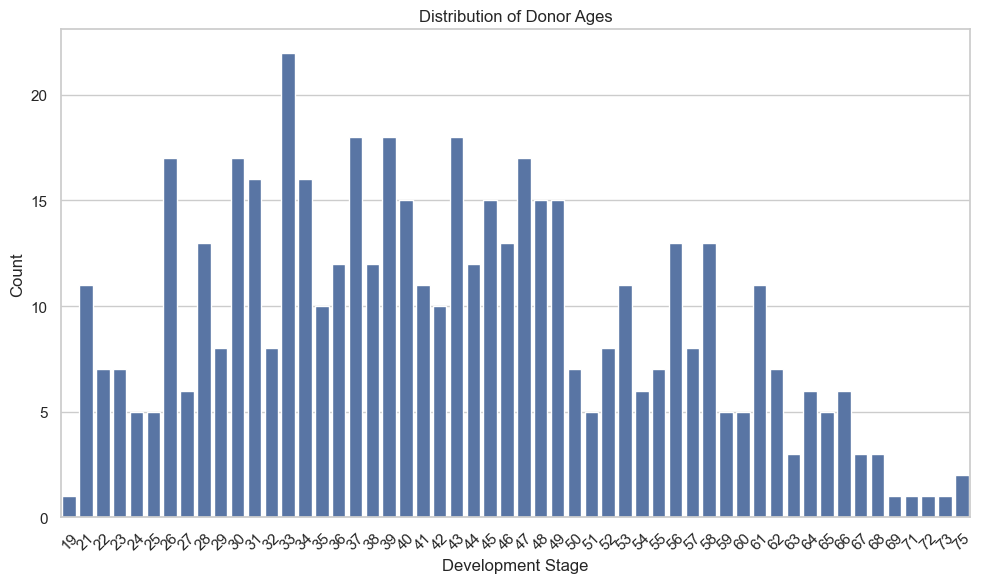

In [7]:
# Plot the distribution of the ages of the donors
order_ages = donor_ids['development_stage'].value_counts().index

# Sort the order_ages from youngest to oldest
order_ages = sorted(order_ages)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=donor_ids, x='development_stage', order=order_ages)
plt.title('Distribution of Donor Ages')
plt.xlabel('Development Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Split the data into 3 groups based on the amount of donors in each age group 33% 33% 33%
youngest = 0
youngest_last_age = 19

# Set the age of the youngest_last_age when youngest is more than 33% of 508
# Loop over the ages and add the amount of donors to the youngest until it is more than 33% of 508
for age in order_ages:
    if youngest > 169:
        break
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    youngest += number_of_donors
    youngest_last_age = age

print(f"Youngest: {youngest} ({youngest_last_age})")

middle = 0
middle_last_age = youngest_last_age

for age in order_ages:
    if middle > 140:
        break
    if age <= youngest_last_age:
        continue
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    middle += number_of_donors
    middle_last_age = age

print(f"Middle: {middle} ({middle_last_age})")

oldest = 0
oldest_last_age = 75

for age in order_ages:
    if age <= middle_last_age:
        continue
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    oldest += number_of_donors

print(f"Oldest: {oldest} ({oldest_last_age})")


Youngest: 181 (36)
Middle: 142 (46)
Oldest: 185 (75)
